##### ~Oğuzhan Akbaş
###### IE360 - Spring'22


# Homework One

   ## 1. Required Packages

In [28]:
library(readxl)
require(data.table)
library(ggplot2)
library(GGally)
library(dplyr)
library(tidyr)
library(lubridate)
library(RColorBrewer)
library(zoo)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


## 2. Manipulation and Preparation of Data

### 2.1 Preparation of Car Production Rate Data

#### 3 Data are selected from three different categories which are Exchange Rates, Production and Tourism
##### The data are Dollar/TL Rate, Total Car Production in Turkey and Number of Tourists Visiting Turkey Each Year, respectively

In [2]:


#Automobile Production in Turkey Data Preparation

auto = read_excel("C://Users//akbas//Desktop//IE360//Homework 01//automobile.xlsx")
names(auto)
colnames(auto) = c('Date', 'Car_Production_Amount', 'drop')
names(auto)

#### We want our data from three different categories to have the same corresponding dates
#### We want to delete the irrelevant rows and columns
auto = subset(auto, select = -c(drop))
auto = auto[-c(120:132),]

#changing the type of Date attribute
str(auto)
auto = auto%>% mutate(Date=as.Date(as.yearmon(Date)))
str(auto)

auto = auto[complete.cases(auto),]
auto$Month=month(auto$Date)
auto$Date = as.Date(auto$Date)
auto$Car_Production_Amount = as.numeric(auto$Car_Production_Amount)

head(auto,10)

str(auto)


New names:
* `` -> ...3


[1] "Tarih"     "TP UR S08" "...3"

[1] "Date"                  "Car_Production_Amount" "drop"

tibble [119 x 2] (S3: tbl_df/tbl/data.frame)
 $ Date                 : chr [1:119] "2012-04" "2012-05" "2012-06" "2012-07" ...
 $ Car_Production_Amount: chr [1:119] "48800" "55662" "49982" "43819" ...
tibble [119 x 2] (S3: tbl_df/tbl/data.frame)
 $ Date                 : Date[1:119], format: "2012-04-01" "2012-05-01" ...
 $ Car_Production_Amount: chr [1:119] "48800" "55662" "49982" "43819" ...


Date,Car_Production_Amount,Month
2012-04-01,48800,4
2012-05-01,55662,5
2012-06-01,49982,6
2012-07-01,43819,7
2012-08-01,21157,8
2012-09-01,54295,9
2012-10-01,51226,10
2012-11-01,53168,11
2012-12-01,44708,12
2013-01-01,40071,1


tibble [119 x 3] (S3: tbl_df/tbl/data.frame)
 $ Date                 : Date[1:119], format: "2012-04-01" "2012-05-01" ...
 $ Car_Production_Amount: num [1:119] 48800 55662 49982 43819 21157 ...
 $ Month                : num [1:119] 4 5 6 7 8 9 10 11 12 1 ...


In [3]:
ymd(auto$Date)
str(auto$Date)

[1] "2012-04-01" "2012-05-01" "2012-06-01" "2012-07-01" "2012-08-01"
  [6] "2012-09-01" "2012-10-01" "2012-11-01" "2012-12-01" "2013-01-01"
 [11] "2013-02-01" "2013-03-01" "2013-04-01" "2013-05-01" "2013-06-01"
 [16] "2013-07-01" "2013-08-01" "2013-09-01" "2013-10-01" "2013-11-01"
 [21] "2013-12-01" "2014-01-01" "2014-02-01" "2014-03-01" "2014-04-01"
 [26] "2014-05-01" "2014-06-01" "2014-07-01" "2014-08-01" "2014-09-01"
 [31] "2014-10-01" "2014-11-01" "2014-12-01" "2015-01-01" "2015-02-01"
 [36] "2015-03-01" "2015-04-01" "2015-05-01" "2015-06-01" "2015-07-01"
 [41] "2015-08-01" "2015-09-01" "2015-10-01" "2015-11-01" "2015-12-01"
 [46] "2016-01-01" "2016-02-01" "2016-03-01" "2016-04-01" "2016-05-01"
 [51] "2016-06-01" "2016-07-01" "2016-08-01" "2016-09-01" "2016-10-01"
 [56] "2016-11-01" "2016-12-01" "2017-01-01" "2017-02-01" "2017-03-01"
 [61] "2017-04-01" "2017-05-01" "2017-06-01" "2017-07-01" "2017-08-01"
 [66] "2017-09-01" "2017-10-01" "2017-11-01" "2017-12-01" "2018-01-01"
 [71] "2018-02-01" "2018-03-01" "2018-04-01" "2018-05-01" "2018-06-01"
 [76] "2018-07-01" "2018-08-01" "2018-09-01" "2018-10-01" "2018-11-01"
 [81] "2018-12-01" "2019-01-01" "2019-02-01" "2019-03-01" "2019-04-01"
 [86] "2019-05-01" "2019-06-01" "2019-07-01" "2019-08-01" "2019-09-01"
 [91] "2019-10-01" "2019-11-01" "2019-12-01" "2020-01-01" "2020-02-01"
 [96] "2020-03-01" "2020-04-01" "2020-05-01" "2020-06-01" "2020-07-01"
[101] "2020-08-01" "2020-09-01" "2020-10-01" "2020-11-01" "2020-12-01"
[106] "2021-01-01" "2021-02-01" "2021-03-01" "2021-04-01" "2021-05-01"
[111] "2021-06-01" "2021-07-01" "2021-08-01" "2021-09-01" "2021-10-01"
[116] "2021-11-01" "2021-12-01" "2022-01-01" "2022-02-01"

 Date[1:119], format: "2012-04-01" "2012-05-01" "2012-06-01" "2012-07-01" "2012-08-01" ...


### 2.2 Preparation of Google Trends Search Data ("Sahibinden Satılık Araba")

In [91]:
#Google Trends Data Preparation

araba= read.csv("trends_search.csv",sep = ",")
colnames(araba) = c('Search_Rate')
araba$Date = rownames(araba)
str(araba)
araba = araba[complete.cases(araba),]
araba = araba[-1,]

araba = araba%>% mutate(Date=as.Date(as.yearmon(Date)))
araba$Month = month(araba$Date)

araba$Search_Rate = as.numeric(araba$Search_Rate)
str(araba)
head(araba, 20)
#Cleaning the Data by removing the irrelevant entries and converting the columns structure into proper forms to be able to operate with them.

'data.frame':	122 obs. of  2 variables:
 $ Search_Rate: Factor w/ 58 levels "100","13","14",..: 58 33 21 8 2 2 5 6 5 2 ...
 $ Date       : chr  "Month" "2012-01" "2012-02" "2012-03" ...
'data.frame':	121 obs. of  3 variables:
 $ Search_Rate: num  33 21 8 2 2 5 6 5 2 3 ...
 $ Date       : Date, format: "2012-01-01" "2012-02-01" ...
 $ Month      : num  1 2 3 4 5 6 7 8 9 10 ...


,Search_Rate,Date,Month
2012-01,33,2012-01-01,1
2012-02,21,2012-02-01,2
2012-03,8,2012-03-01,3
2012-04,2,2012-04-01,4
2012-05,2,2012-05-01,5
2012-06,5,2012-06-01,6
2012-07,6,2012-07-01,7
2012-08,5,2012-08-01,8
2012-09,2,2012-09-01,9
2012-10,3,2012-10-01,10


### 2.3 Preparation of Dollar/TL Exchange Rate Data

In [5]:
#Dollar/TL Exchange Rate Data Preparation

exchange = read_excel("C://Users//akbas//Desktop//IE360//Homework 01//dolar_tl.xlsx")
names(exchange)
colnames(exchange) = c('Date', 'Dolar_TL', 'drop')
# We want our data from three different category to have the same corresponding dates
# We want to delete the irrelevant rows and columns
exchange = subset(exchange, select = -c(drop))
exchange = exchange[-c(120:129),]
head(exchange)
exchange = exchange[complete.cases(exchange),]
exchange = exchange%>% mutate(Date= as.Date(as.yearmon(Date)))
exchange$Date = as.IDate(exchange$Date)
exchange$Month=month(exchange$Date)
exchange$Dolar_TL = as.numeric(exchange$Dolar_TL)
tail(exchange)
str(exchange)

New names:
* `` -> ...3


[1] "Tarih"           "TP DK USD A YTL" "...3"

Date,Dolar_TL
2012-04,1.77984
2012-05,1.7969545454545
2012-06,1.8160714285714
2012-07,1.8048863636364
2012-08,1.78584
2012-09,1.79563


Date,Dolar_TL,Month
2021-09-01,8.511882,9
2021-10-01,9.139945,10
2021-11-01,10.523264,11
2021-12-01,13.528496,12
2022-01-01,13.519262,1
2022-02-01,13.621125,2


tibble [119 x 3] (S3: tbl_df/tbl/data.frame)
 $ Date    : IDate[1:119], format: "2012-04-01" "2012-05-01" ...
 $ Dolar_TL: num [1:119] 1.78 1.8 1.82 1.8 1.79 ...
 $ Month   : num [1:119] 4 5 6 7 8 9 10 11 12 1 ...


### 2.4 Preparation of Tourist Data

In [6]:
#Tourist Visiting Turkey Data Preparation

tourist = read_excel("C://Users//akbas//Desktop//IE360//Homework 01//tourist.xlsx")
names(tourist)
colnames(tourist) = c('Date', 'Tourist_Amount', 'drop')
tail(tourist)
#removing irrelevant text inputs
tourist = subset(tourist, select = -c(drop))
tourist = tourist[-c(120:130),]
tourist = tourist[complete.cases(tourist),]
str(tourist)
tourist = tourist%>% mutate( Date= as.Date(as.yearmon(Date)))
tourist$Date = as.IDate(tourist$Date)
tourist$Month = month(tourist$Date)
tourist$'Tourist_Amount' = as.numeric(tourist$'Tourist_Amount')
head(tourist)
str(tourist)

New names:
* `` -> ...3


[1] "Tarih"                "TP URISTSAYIL TOPLAM" "...3"

Date,Tourist_Amount,drop
Notlar,NA,NA
TP.URISTSAYIL.TOPLAM,Uygulama Degisiklik Linki,http://www.tuik.gov.tr/PreTablo.do?alt_id=1072
NA,Veri Kaynagi,T.C. KÜLTÜR VE TURIZM BAKANLIGI
NA,Veri Yayinlama Takvim Linki,http://www.tuik.gov.tr/takvim/tkvim.zul#tb2
NA,Metaveri Linki,http://www.tuik.gov.tr/PreTablo.do?alt_id=1072
NA,Revizyon Politika Linki,http://www.tuik.gov.tr/PreTablo.do?alt_id=1072


tibble [119 x 2] (S3: tbl_df/tbl/data.frame)
 $ Date          : chr [1:119] "2012-04" "2012-05" "2012-06" "2012-07" ...
 $ Tourist_Amount: chr [1:119] "2168715" "3232926" "3882592" "4571389" ...


Date,Tourist_Amount,Month
2012-04-01,2168715,4
2012-05-01,3232926,5
2012-06-01,3882592,6
2012-07-01,4571389,7
2012-08-01,4470202,8
2012-09-01,3991415,9


tibble [119 x 3] (S3: tbl_df/tbl/data.frame)
 $ Date          : IDate[1:119], format: "2012-04-01" "2012-05-01" ...
 $ Tourist_Amount: num [1:119] 2168715 3232926 3882592 4571389 4470202 ...
 $ Month         : num [1:119] 4 5 6 7 8 9 10 11 12 1 ...


## 3. Data Visualization

### 3.1 Plots for Production Amounts fo Automobile in Turkey

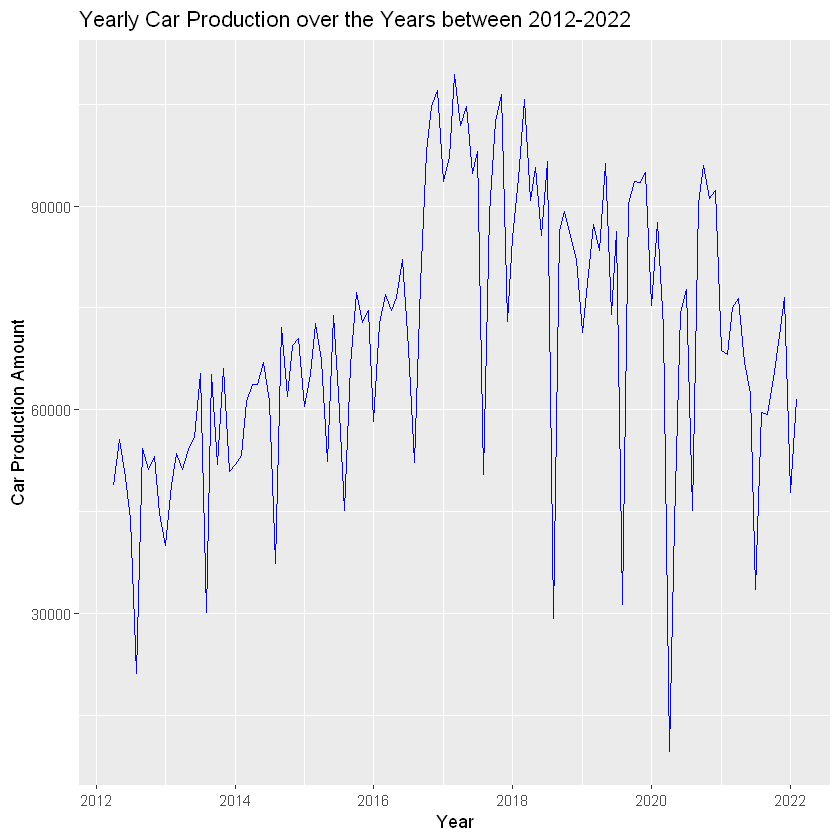

In [45]:
ggplot(auto, aes(x=Date, y=Car_Production_Amount)) +geom_line(color='blue') + labs(x="Year",y="Car Production Amount",
       title="Yearly Car Production over the Years between 2012-2022")


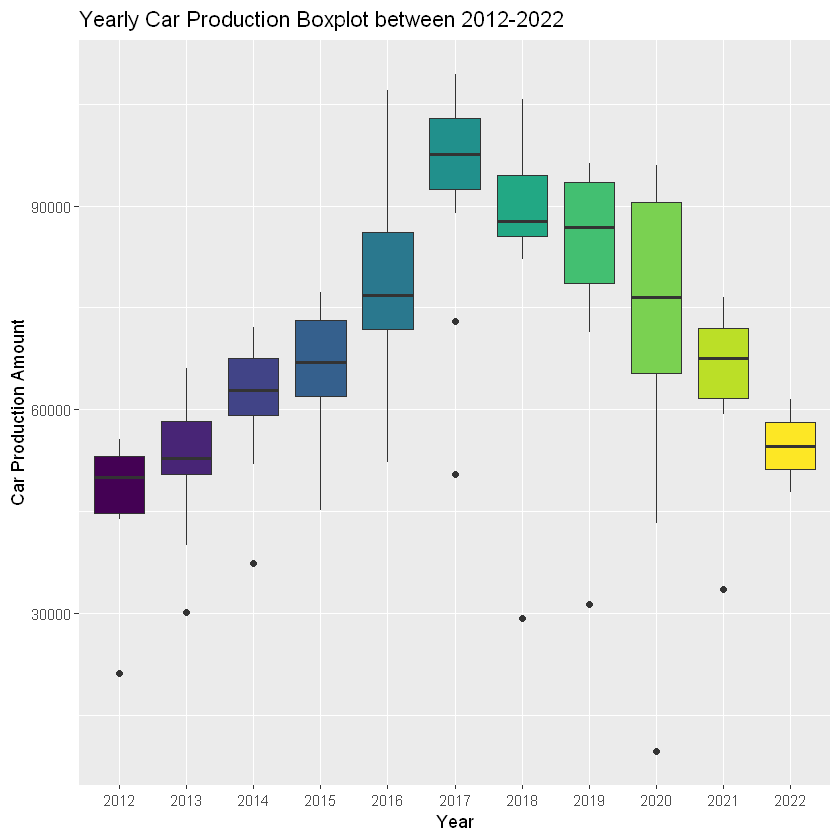

In [8]:
#ggplot(auto, aes(x=Date, y=Car_Production_Amount)) +geom_boxplot(color="red")
ggplot(auto,aes(x=factor(year(Date)), y=Car_Production_Amount))+
  geom_boxplot(aes(fill=factor(year(Date))))+
  theme(legend.position = "none")+
  labs(x="Year",y="Car Production Amount",
       title="Yearly Car Production Boxplot between 2012-2022")+
  scale_fill_viridis_d()

## In Boxplot analysis, we can see the trend going upwards in total production until 2017. After 2017, we observe a downward trend overall.

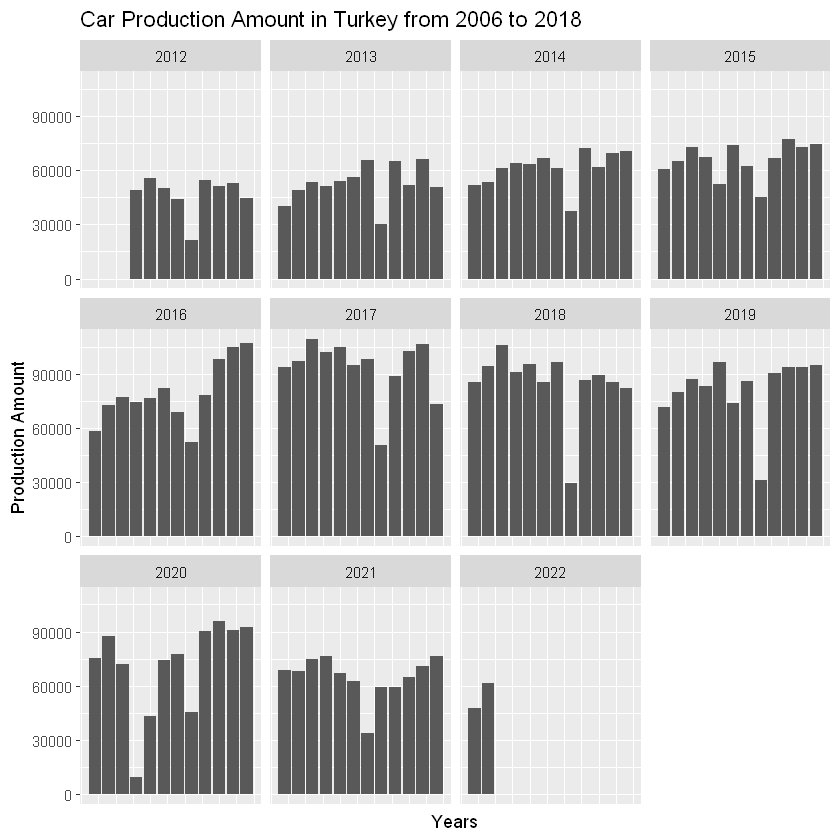

In [9]:
ggplot(auto,aes(x=Month,y=Car_Production_Amount))+ geom_bar(stat='identity')+ 
  facet_wrap(~year(Date))+
  theme(legend.position = "none",
        axis.ticks.x = element_blank(),
        axis.text.x = element_blank())+
  xlab("Years") + ylab("Production Amount")+ ggtitle("Car Production Amount in Turkey from 2006 to 2018")

## As it can be clearly seen, in summer season, there are drastic decreases in the car production amounts throughout the decade. 


### 3.2 "Sahibinden Satılık Araba" Search Visualization

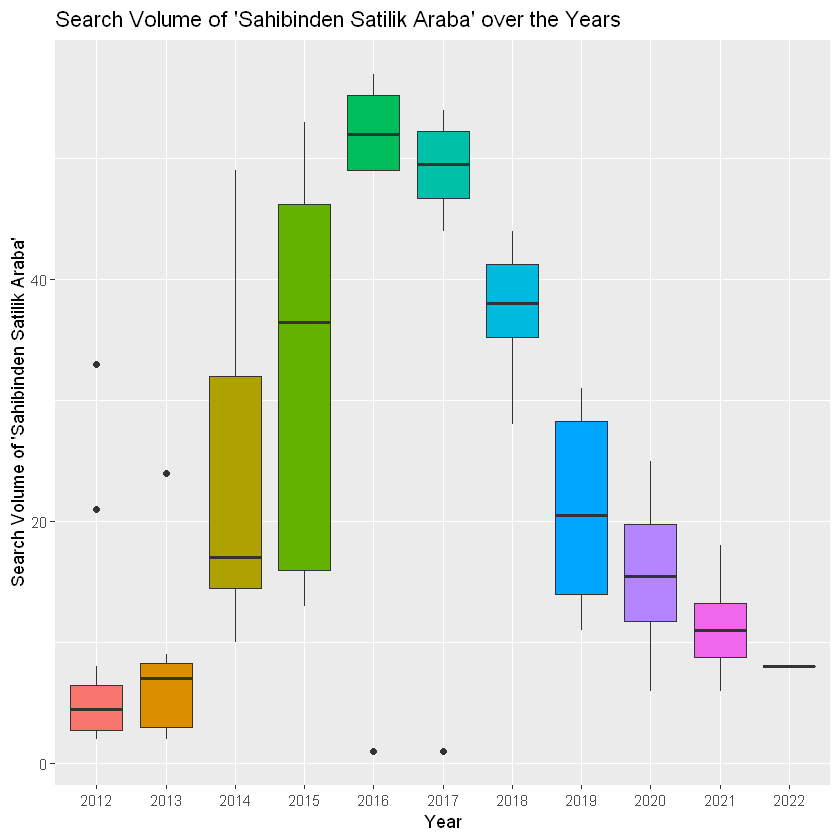

In [70]:
ggplot(araba,aes(x=Month, y=Search_Rate))+
  geom_boxplot(aes(x=factor(year(Date)),y= Search_Rate, fill= factor(year(Date))))+
  theme(legend.position = "none")+
  labs(x="Year",y="Search Volume of 'Sahibinden Satılık Araba'",
       title="Search Volume of 'Sahibinden Satılık Araba' over the Years")

## In the boxplot, we observe that the search numbers and the trends in terms of years are compatible with the result we found from the boxplot of Car Production Amounts. Therefore, we can say that there is a correlation between them.

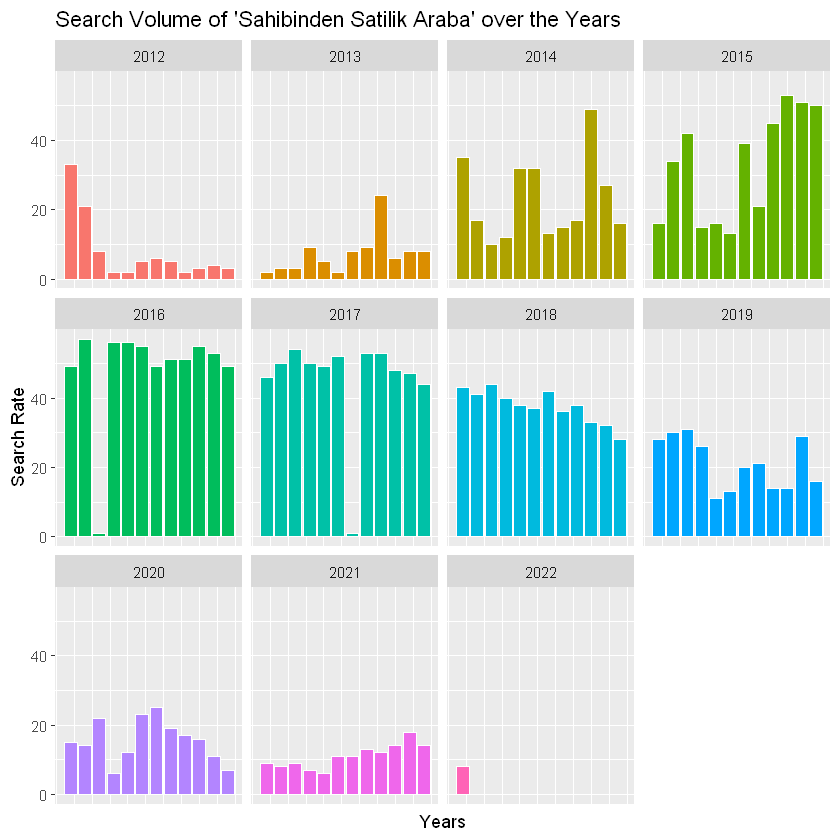

In [11]:
ggplot(araba,aes(x=Month,y=Search_Rate))+
geom_bar(stat='identity', aes(fill=factor(year(Date))),color="white")+ 
  facet_wrap(~year(Date))+
  theme(legend.position = "none",
        axis.ticks.x = element_blank(),
        axis.text.x = element_blank())+
  xlab("Years") + ylab("Search Rate")+ ggtitle("Search Volume of 'Sahibinden Satılık Araba' over the Years")

### 3.3 Number of Tourists Visiting Turkey Over the Years Plots

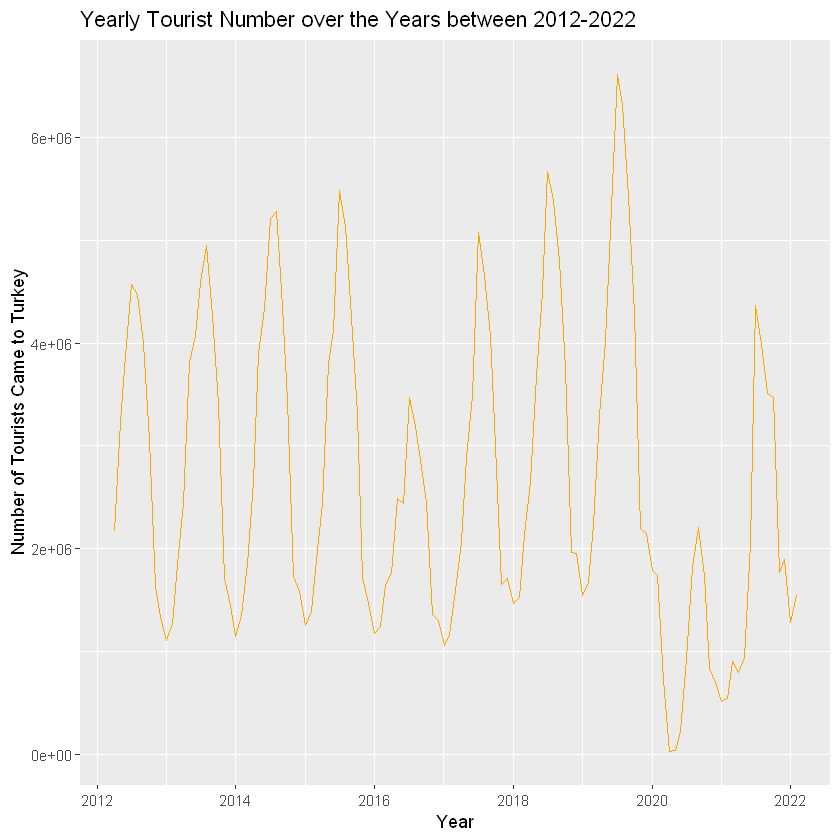

In [12]:
ggplot(tourist, aes(x=Date, y=Tourist_Amount)) + geom_line(color='orange') + labs(x="Year",y="Number of Tourists Came to Turkey",
       title="Yearly Tourist Number over the Years between 2012-2022")

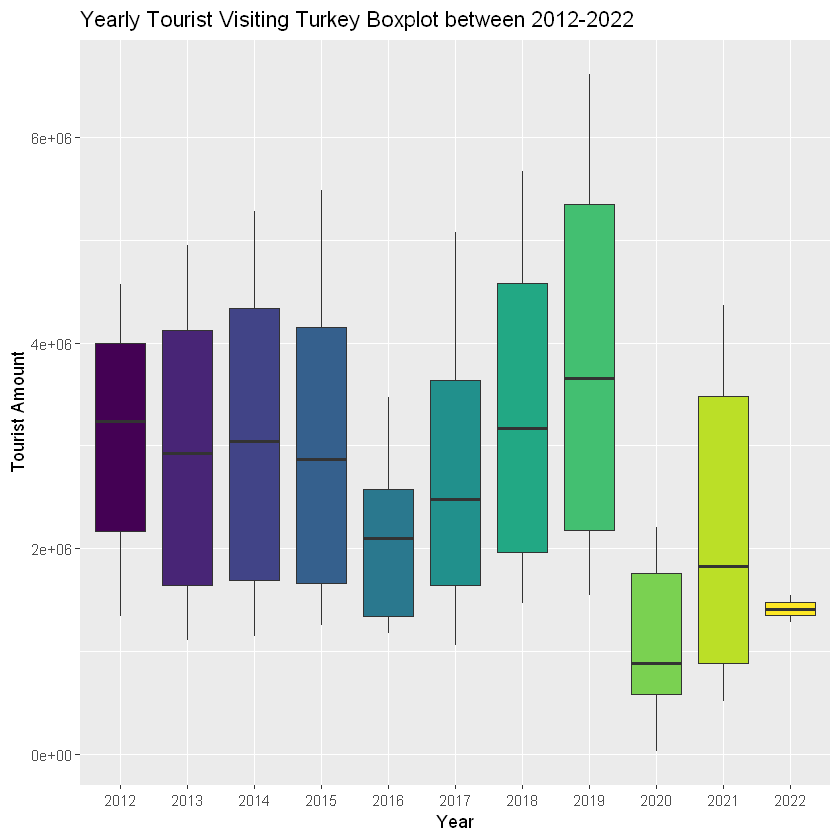

In [13]:
ggplot(tourist,aes(x=factor(year(Date)), y=Tourist_Amount))+
  geom_boxplot(aes(fill=factor(year(Date))))+
  theme(legend.position = "none")+
  labs(x="Year",y="Tourist Amount",
       title="Yearly Tourist Visiting Turkey Boxplot between 2012-2022")+
  scale_fill_viridis_d()

## Here we do not see a trend until 2015, and between 2015 and 2019 (up until pandemic) there is a positive trend. Since, we only have January and February info for 2022, its IQR is too small. 

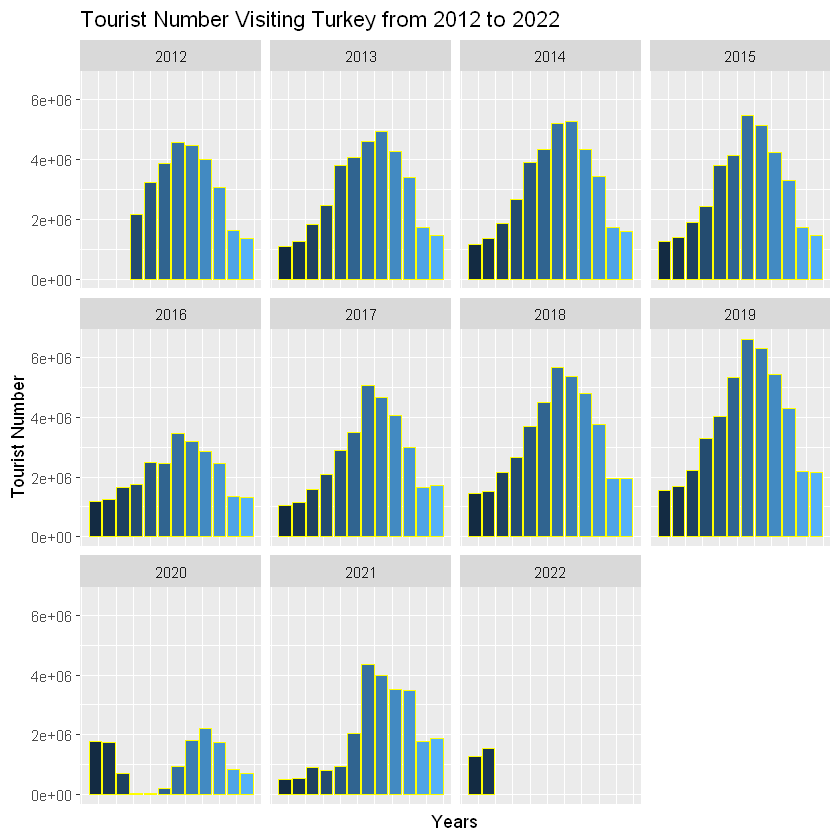

In [14]:
ggplot(tourist,aes(x=Month,y=Tourist_Amount))+
geom_bar(stat='identity', aes(fill=Month),color="yellow")+ 
  facet_wrap(~year(Date))+
  theme(legend.position = "none",
        axis.ticks.x = element_blank(),
        axis.text.x = element_blank())+
  xlab("Years") + ylab("Tourist Number")+ ggtitle("Tourist Number Visiting Turkey from 2012 to 2022")


##  From this plot, we see a seasonality which occurs in the form of an increase in summers.

### Plots for the Dollar/TL Exchange Rate Over the Years 

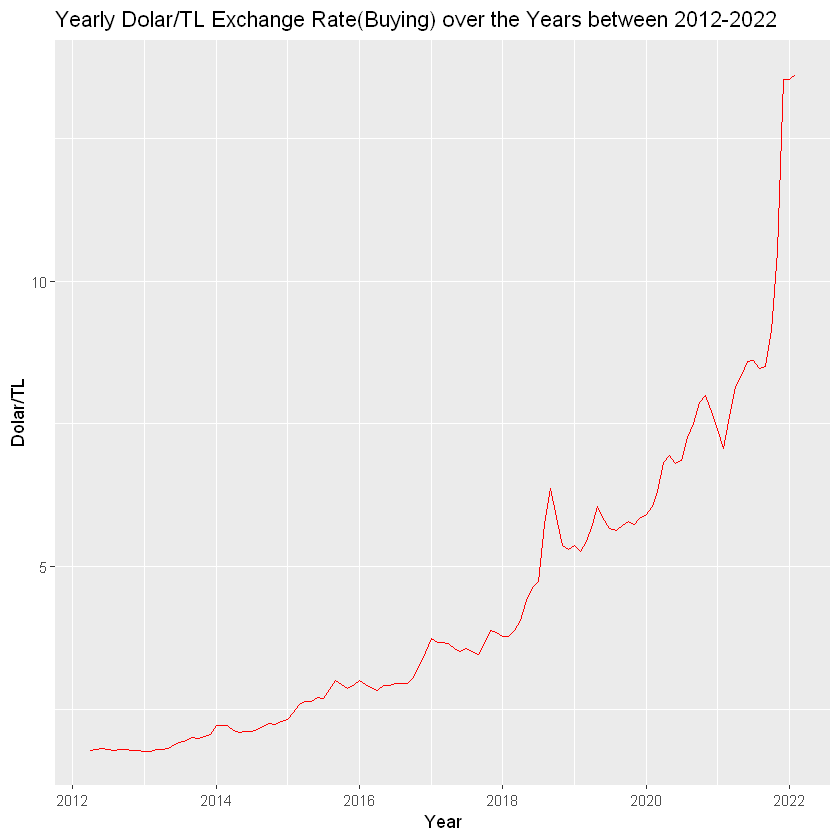

In [15]:
ggplot(exchange, aes(x=Date, y=Dolar_TL)) + geom_line(color='red') + labs(x="Year",y="Dolar/TL",
       title="Yearly Dolar/TL Exchange Rate(Buying) over the Years between 2012-2022")

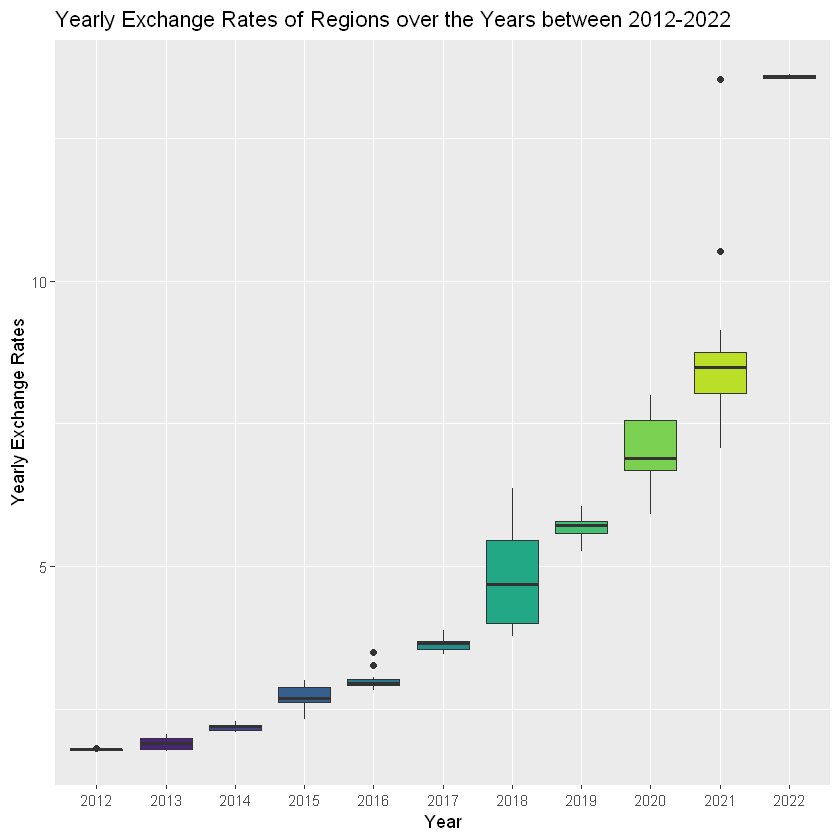

In [135]:
ggplot(exchange,aes(x=factor(year(Date)), y=Dolar_TL))+
  geom_boxplot(aes(fill=factor(year(Date))))+
  theme(legend.position = "none")+
  labs(x="Year",y="Yearly Exchange Rates",
       title="Yearly Exchange Rates of Regions over the Years between 2012-2022")+
  scale_fill_viridis_d()

## We see a general increasing trend besides the info about the volatility of the Turkish currency. In 2018, 2020 and 2021, Turkish Lira oscillated in a very large range, therefore inter quantile ranges for these years are larger than others.

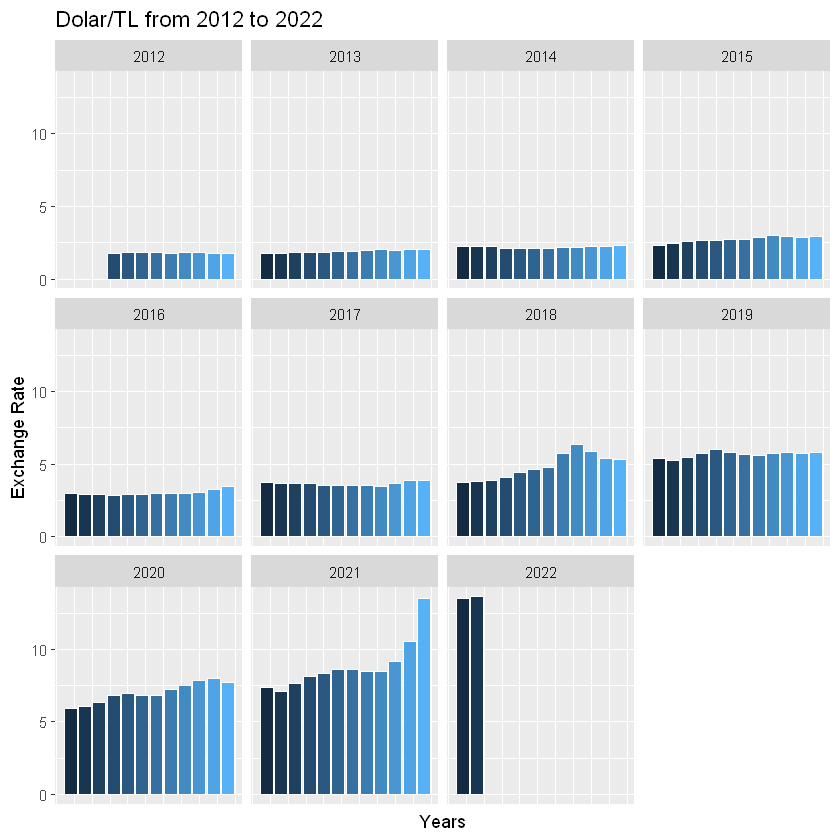

In [16]:
ggplot(exchange,aes(x=Month,y=Dolar_TL))+
geom_bar(stat='identity', aes(fill=Month),color="white")+ 
  facet_wrap(~year(Date))+
  theme(legend.position = "none",
        axis.ticks.x = element_blank(),
        axis.text.x = element_blank())+
  xlab("Years") + ylab("Exchange Rate")+ ggtitle("Dolar/TL from 2012 to 2022")

## A non-decreasing trend is best observed in the bar plot.

In [94]:
head(araba)
str(araba)

,Search_Rate,Date,Month
2012-01,33,2012-01-01,1
2012-02,21,2012-02-01,2
2012-03,8,2012-03-01,3
2012-04,2,2012-04-01,4
2012-05,2,2012-05-01,5
2012-06,5,2012-06-01,6


'data.frame':	121 obs. of  3 variables:
 $ Search_Rate: num  33 21 8 2 2 5 6 5 2 3 ...
 $ Date       : Date, format: "2012-01-01" "2012-02-01" ...
 $ Month      : num  1 2 3 4 5 6 7 8 9 10 ...


In [95]:
cor(exchange$Dolar_TL, auto$Car_Production_Amount)
cor(exchange$Dolar_TL, tourist$Tourist_Amount)
cor(auto$Car_Production_Amount, tourist$Tourist_Amount)
head(araba)
# In order to keep the lengths equal, a tiny manipulation on "araba" is done.
araba = araba[-c(1:2),]
cor(auto$Car_Production_Amount, araba$Search_Rate)


[1] 0.132302

[1] -0.2101137

[1] -0.130567

,Search_Rate,Date,Month
2012-01,33,2012-01-01,1
2012-02,21,2012-02-01,2
2012-03,8,2012-03-01,3
2012-04,2,2012-04-01,4
2012-05,2,2012-05-01,5
2012-06,5,2012-06-01,6


[1] 0.5408753

### We see the correlations between the exchange rate, car production, tourist amount and the search for car sales.

#####  Data Preparation for Correlation Data

In [98]:
corr_data = read_excel("C://Users//akbas//Desktop//IE360//Homework 01//all_in_one.xlsx")
tail(corr_data)

Date,TP URISTSAYIL TOPLAM,TP DK USD A YTL,TP UR S08
TP.UR.S08,Methodological Changes,http://www.turkstat.gov.tr/PreTablo.do?alt_id=124,NA
NA,Datasource,AUTOMOTIVE INDUSTRY ASSOCIATION,NA
NA,Data Release Calendar,http://www.tuik.gov.tr/takvim/tkvim.zul#tb1,NA
NA,Metadata Link,http://vi.sanayi.gov.tr/productivitystatistics/Files/MetadataQuarterlyProductivityStatistics(21-1).pdf,NA
NA,Revision Politicy,http://www.turkstat.gov.tr/PreTablo.do?alt_id=124,NA
NA,Tags,"Total, Cars, Production",NA


In [99]:
colnames(corr_data) = c('Date', 'tourist', 'exchange_rate', 'car_production')
corr_data = corr_data[complete.cases(corr_data),]
corr_data = corr_data[-c(121:141),]
str(corr_data)
corr_data$Date = as.Date(as.yearmon(corr_data$Date))
corr_data$tourist = as.numeric(corr_data$tourist)
corr_data$exchange_rate = as.numeric(corr_data$exchange_rate)
corr_data$car_production = as.numeric(corr_data$car_production)
corr_data$Month = month(corr_data$Date)
corr_data$Search = araba$Search_Rate
head(corr_data)
str(corr_data)

tibble [119 x 4] (S3: tbl_df/tbl/data.frame)
 $ Date          : chr [1:119] "2012-04" "2012-05" "2012-06" "2012-07" ...
 $ tourist       : chr [1:119] "2168715" "3232926" "3882592" "4571389" ...
 $ exchange_rate : chr [1:119] "1.77984" "1.7969545454545" "1.8160714285714" "1.8048863636364" ...
 $ car_production: num [1:119] 48800 55662 49982 43819 21157 ...


Date,tourist,exchange_rate,car_production,Month,Search
2012-04-01,2168715,1.779840,48800,4,8
2012-05-01,3232926,1.796955,55662,5,2
2012-06-01,3882592,1.816071,49982,6,2
2012-07-01,4571389,1.804886,43819,7,5
2012-08-01,4470202,1.785840,21157,8,6
2012-09-01,3991415,1.795630,54295,9,5


tibble [119 x 6] (S3: tbl_df/tbl/data.frame)
 $ Date          : Date[1:119], format: "2012-04-01" "2012-05-01" ...
 $ tourist       : num [1:119] 2168715 3232926 3882592 4571389 4470202 ...
 $ exchange_rate : num [1:119] 1.78 1.8 1.82 1.8 1.79 ...
 $ car_production: num [1:119] 48800 55662 49982 43819 21157 ...
 $ Month         : num [1:119] 4 5 6 7 8 9 10 11 12 1 ...
 $ Search        : num [1:119] 8 2 2 5 6 5 2 3 4 3 ...


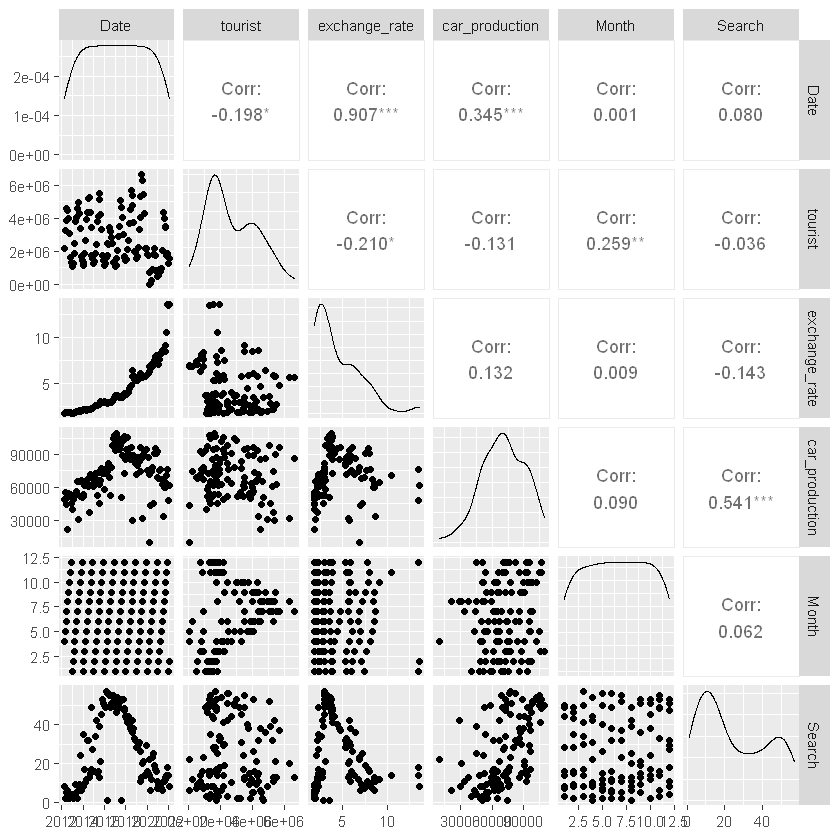

In [100]:
ggpairs(corr_data)

## There is not a remarkable correlation in overall. Only the correlation between the car production rate and the search rate for "Sahibinden Satılık Araba" is nearly 0.54.